In [5]:
from pathlib import Path

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

import numpy as np

In [108]:
def read_3d_volume(fileName, nx, ny, nz, dtype=np.float32):

    #print('Reading 3D volume file: ', fileName)
    f = open(fileName, "rb")
    data = np.fromfile(f, dtype=dtype)

    #size = nx*ny*nz
    shape = (nz, ny, nx)

    return data.reshape(shape)

def project_left(vol):
    vol_rot = np.transpose(vol, axes=(2,1,0))
    return np.flipud(np.rot90(np.sum(vol_rot, axis=0)))

def project_top(vol):
    vol_rot = np.transpose(vol, axes=(1,2,0))
    return np.rot90(np.sum(vol_rot, axis=0))

def project_front(vol):
    return np.sum(vol, axis=0)

def make_three_projections(vol):
    
    im1 = project_front(vol)
    m1 = np.mean(im1)
    std1 = np.std(im1)
    
    im2 = project_left(vol)
    m2 = np.mean(im2)
    std2 = np.std(im2)
    
    im3 = project_top(vol)
    m3 = np.mean(im3)
    std3 = np.std(im3)
    
    return (im1, m1, std1), (im2, m2, std2), (im3, m3, std3) 
    

In [103]:
input_path = Path('P:\\batteries')

adjust_scale = True

v_scale = 2.0

## GFD

In [ ]:
# Volume sizes for GFD_100mV, GFD_200mV, GFD_300mV
volume_sizes = [(777, 627, 500), (778,629,500), (776, 635, 500)]
frame = '02'

In [104]:
d = 0
GFD100 = read_3d_volume(input_path / f'GFD_100mV_tomo_{frame}_air.raw', volume_sizes[d][0], volume_sizes[d][1], volume_sizes[d][2], np.uint8)

d = 1 
GFD200 = read_3d_volume(input_path / f'GFD_200mV_tomo_{frame}_air.raw', volume_sizes[d][0], volume_sizes[d][1], volume_sizes[d][2], np.uint8)

d = 2 
GFD300 = read_3d_volume(input_path / f'GFD_300mV_tomo_{frame}_air.raw', volume_sizes[d][0], volume_sizes[d][1], volume_sizes[d][2], np.uint8)

In [70]:
membrane = read_3d_volume(input_path / 'GFD_100mV_tomo_01_mem.raw', nx, ny, nz, np.uint8)
#gaskets = read_3d_volume(input_path / 'gaskets.raw', nx, ny, nz, np.uint8)

In [21]:
i = 200

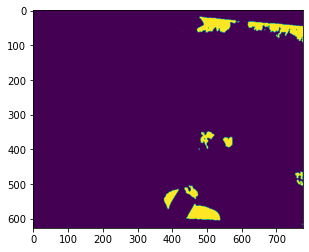

In [69]:
plt.imshow(vol[i])

In [106]:
GFD100_proj1, GFD100_proj2, GFD100_proj3 = make_three_projections(GFD100)
GFD200_proj1, GFD200_proj2, GFD200_proj3 = make_three_projections(GFD200)
GFD300_proj1, GFD300_proj2, GFD300_proj3 = make_three_projections(GFD300)

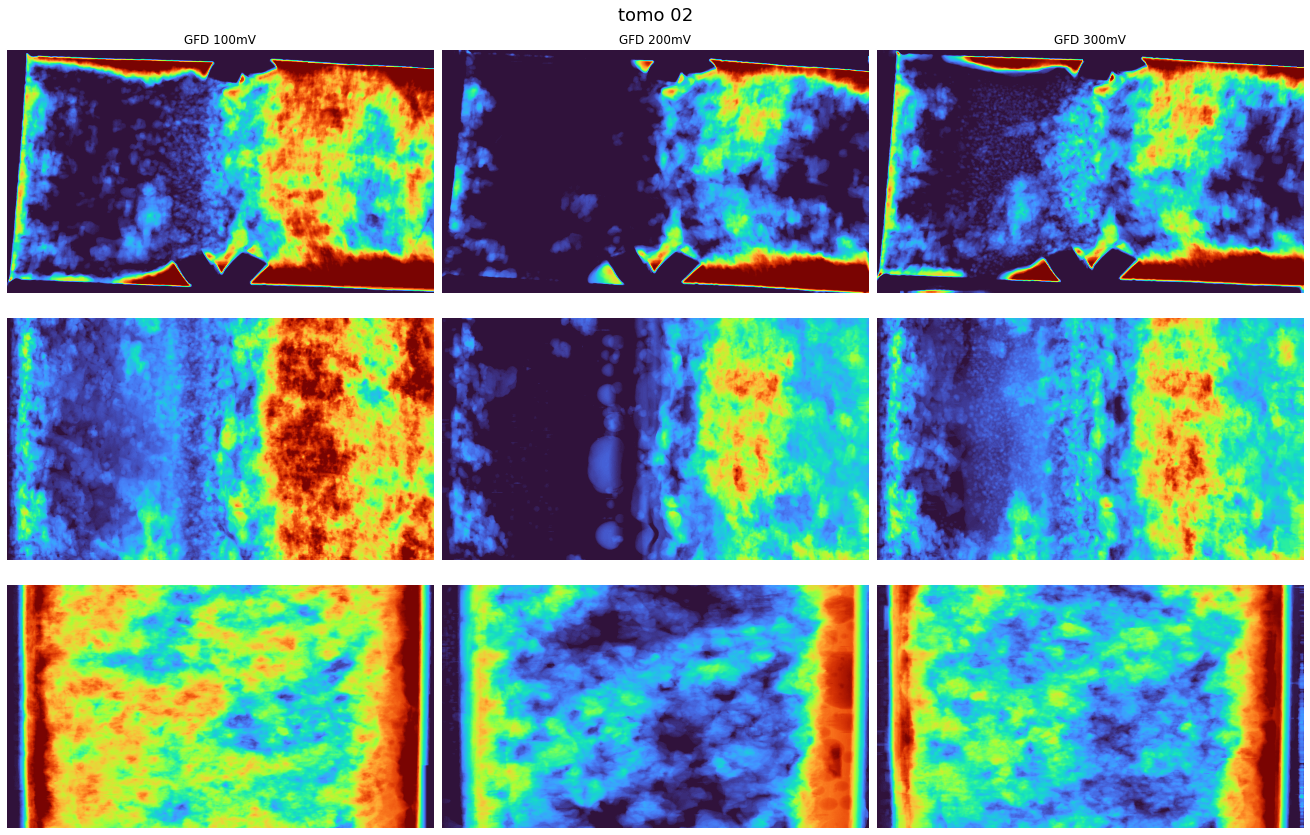

In [107]:
fig = plt.figure()

fig.set_size_inches(18, 12, forward=True)
plt.subplots_adjust(top=0.90, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(3, 3)


# Projection 1
proj1_mean = np.max([GFD100_proj1[1], GFD200_proj1[1], GFD300_proj1[1]])
proj1_std = np.max([GFD100_proj1[2], GFD200_proj1[2], GFD300_proj1[2]])             
v = proj1_mean+v_scale*proj1_std

im = GFD100_proj1[0]
im[im>v] = v
ax0 = plt.subplot(gs[0, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFD 100mV')
#ax0.set_ylabel('100')
#ax0.text(0.5, 0.5, 'top view', va="center", ha="center", fontsize=16)
#ax0.text(0.5, 0.5,"top", va="center", ha="center", fontsize=16)

im = GFD200_proj1[0]
im[im>v] = v
ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFD 200mV')
#plt.show()

im = GFD300_proj1[0]
im[im>v] = v
ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFD 300mV')

# Projection 2
proj2_mean = np.max([GFD100_proj2[1], GFD200_proj2[1], GFD300_proj2[1]])
proj2_std = np.max([GFD100_proj2[2], GFD200_proj2[2], GFD300_proj2[2]])             
v = proj2_mean+v_scale*proj2_std

im = GFD100_proj2[0]
im[im>v] = v
ax3 = plt.subplot(gs[2, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

im = GFD200_proj2[0]
im[im>v] = v
ax4 = plt.subplot(gs[2, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

im = GFD300_proj2[0]
im[im>v] = v
ax5 = plt.subplot(gs[2, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
#plt.show()


# Projection 3
proj3_mean = np.max([GFD100_proj3[1], GFD200_proj3[1], GFD300_proj3[1]])
proj3_std = np.max([GFD100_proj3[2], GFD200_proj3[2], GFD300_proj3[2]])             
v = proj3_mean+v_scale*proj3_std

im = GFD100_proj3[0]
im[im>v] = v
ax6 = plt.subplot(gs[1, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

im = GFD200_proj3[0]
im[im>v] = v
ax7 = plt.subplot(gs[1, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

im = GFD300_proj3[0]
im[im>v] = v
ax8 = plt.subplot(gs[1, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

fig.suptitle(f'tomo {frame}', x=0.5, y=0.95, fontsize=18, va='top')

fig.savefig(input_path / f'GFD_projections_tomo{frame}.png')
#plt.show()

## GFA

In [114]:
# Volume sizes for GFA_300mV
volume_sizes = [(577, 530, 590)]
frame = '02'

d = 0
GFA300 = read_3d_volume(input_path / f'GFA_300mV_tomo_{frame}_air.raw', volume_sizes[d][0], volume_sizes[d][1], volume_sizes[d][2], np.uint8)

In [115]:
GFA300_proj1, GFA300_proj2, GFA300_proj3 = make_three_projections(GFA300)

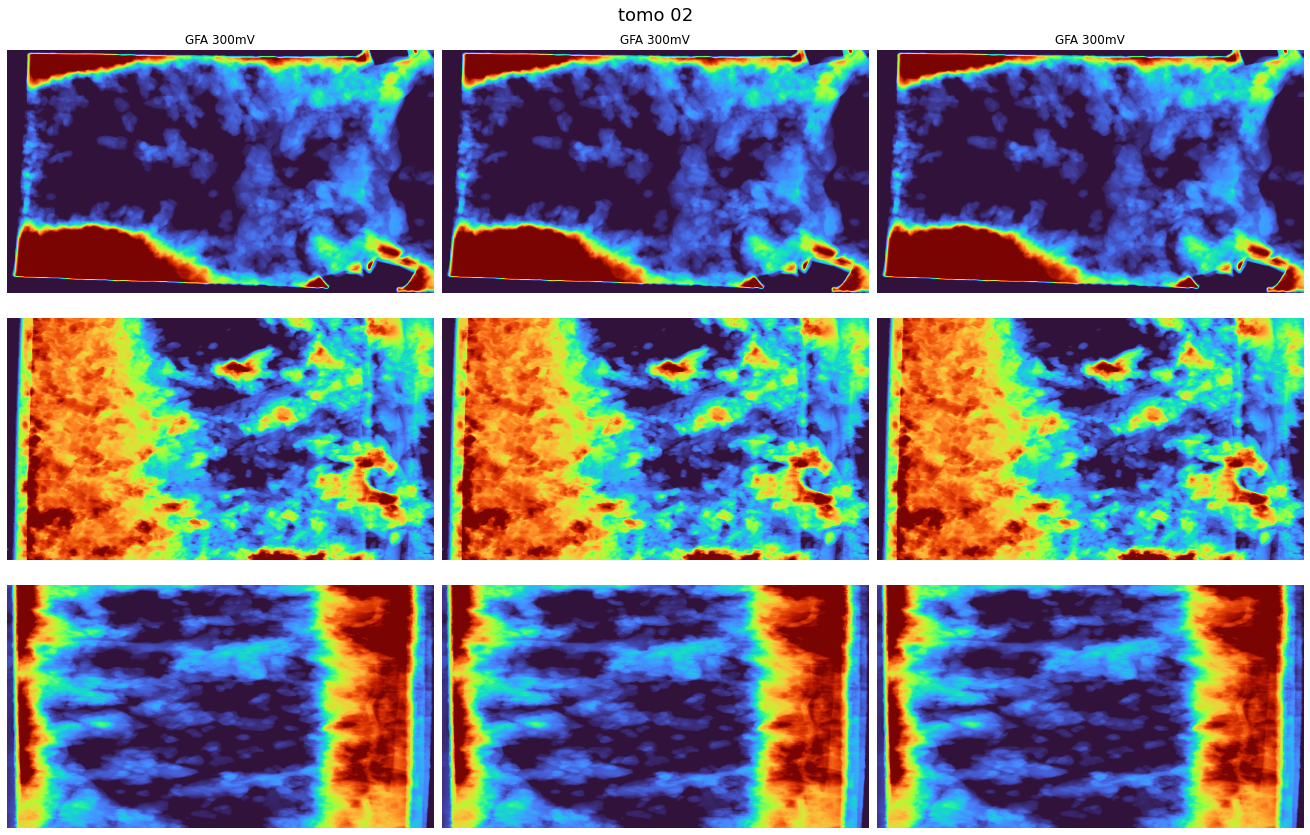

In [116]:
fig = plt.figure()

fig.set_size_inches(18, 12, forward=True)
plt.subplots_adjust(top=0.90, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(3, 3)


# Projection 1
proj1_mean = GFA300_proj1[1]
proj1_std = GFA300_proj1[2]           
v = proj1_mean+v_scale*proj1_std

im = GFA300_proj1[0]
im[im>v] = v
ax0 = plt.subplot(gs[0, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFA 300mV')
#ax0.set_ylabel('100')
#ax0.text(0.5, 0.5, 'top view', va="center", ha="center", fontsize=16)
#ax0.text(0.5, 0.5,"top", va="center", ha="center", fontsize=16)

#im = GFD200_proj1[0]
#im[im>v] = v
ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFA 300mV')


#im = GFD300_proj1[0]
#im[im>v] = v
ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')
plt.title('GFA 300mV')

# Projection 2
proj2_mean = GFA300_proj2[1]
proj2_std = GFA300_proj2[2]         
v = proj2_mean+v_scale*proj2_std

im = GFA300_proj2[0]
im[im>v] = v
ax3 = plt.subplot(gs[2, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

#im = GFD200_proj2[0]
#im[im>v] = v
ax4 = plt.subplot(gs[2, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

#im = GFD300_proj2[0]
#im[im>v] = v
ax5 = plt.subplot(gs[2, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')


# Projection 3
proj3_mean = GFA300_proj3[1]
proj3_std = GFA300_proj3[2]           
v = proj3_mean+v_scale*proj3_std

im = GFA300_proj3[0]
im[im>v] = v
ax6 = plt.subplot(gs[1, 0])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

#im = GFD200_proj3[0]
#im[im>v] = v
ax7 = plt.subplot(gs[1, 1])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

#im = GFD300_proj3[0]
#im[im>v] = v
ax8 = plt.subplot(gs[1, 2])
plt.axis('off')
plt.imshow(im, cmap='turbo', aspect='auto')

fig.suptitle(f'tomo {frame}', x=0.5, y=0.95, fontsize=18, va='top')

fig.savefig(input_path / f'GFA_projections_tomo{frame}.png')
#plt.show()

## Testing

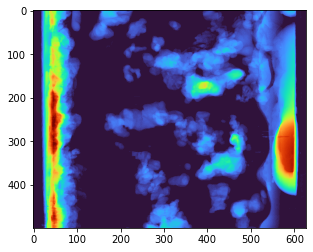

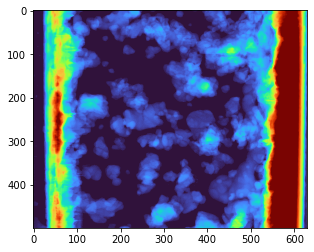

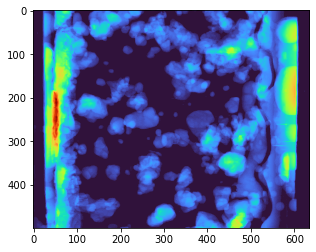

In [11]:
# Projection 2
proj2_mean = np.max([GFD100_proj2[1], GFD200_proj2[1], GFD300_proj2[1]])
proj2_std = np.max([GFD100_proj2[2], GFD200_proj2[2], GFD300_proj2[2]])             
v = proj2_mean+v_scale*proj2_std

im = GFD100_proj2[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

im = GFD200_proj2[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

im = GFD300_proj2[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

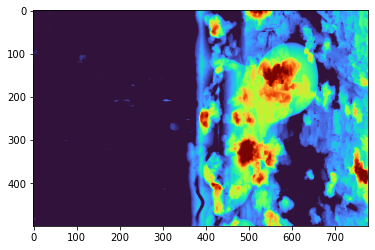

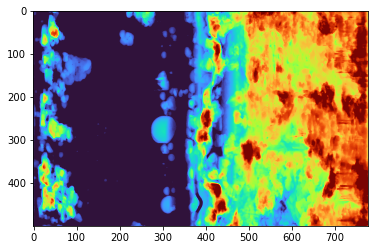

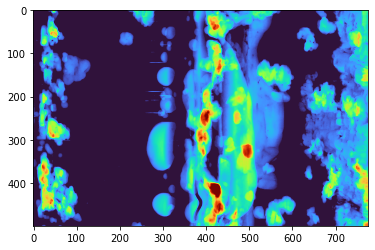

In [12]:
# Projection 3
proj3_mean = np.max([GFD100_proj3[1], GFD200_proj3[1], GFD300_proj3[1]])
proj3_std = np.max([GFD100_proj3[2], GFD200_proj3[2], GFD300_proj3[2]])             
v = proj3_mean+v_scale*proj3_std

im = GFD100_proj3[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

im = GFD200_proj3[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

im = GFD300_proj3[0]
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()

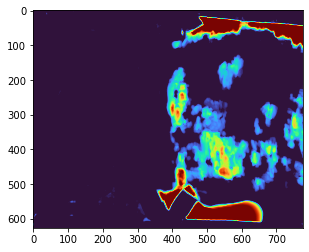

Mean 2727.594535068219
Max 32821


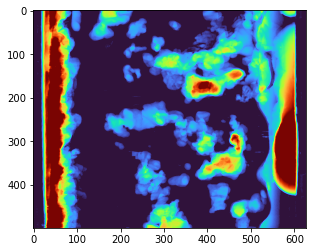

Mean 5446.673598086124
Max 27618


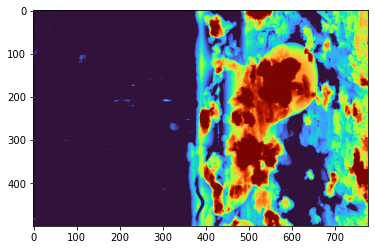

Mean 4638.055096525097
Max 20517


In [93]:
vol=vol1

im = project_front(vol)

v_scale = 2.0

v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

im = project_left(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

im = project_top(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

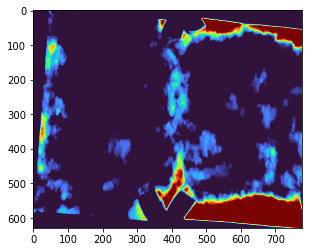

Mean 6481.822652760125
Max 63062


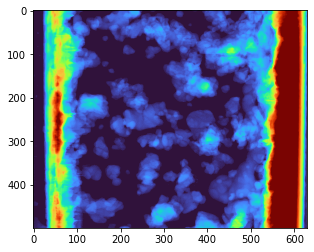

Mean 12744.227370429253
Max 60567


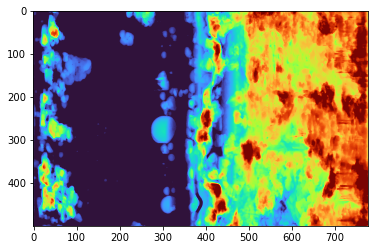

Mean 11535.793508997429
Max 34813


In [99]:
vol=vol3

im = project_front(vol)

v_scale = 2.0

v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

im = project_left(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

im = project_top(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

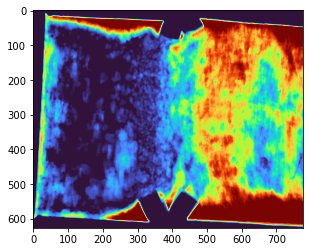

Mean 37239.04912157544
Mean 39081.4133284758
Max 117924


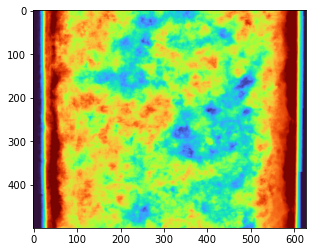

Mean 58204.852137161084
Max 111035


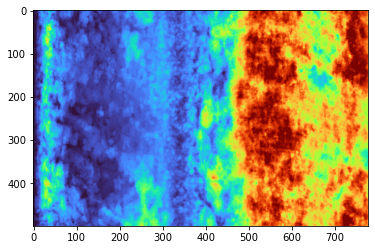

Mean 47226.33205405405
Max 120777


In [92]:
vol=vol2

im = project_front(vol)

v_scale = 2.0

v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Mean', np.std(im))
print('Max', np.max(im))

im = project_left(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

im = project_top(vol)
v = np.mean(im)+v_scale*np.std(im)
im[im>v] = v
plt.imshow(im, cmap='turbo')
plt.show()
print('Mean', np.mean(im))
print('Max', np.max(im))

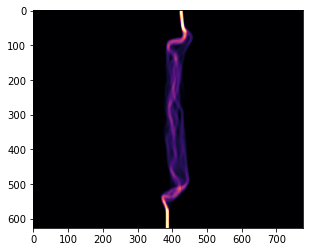

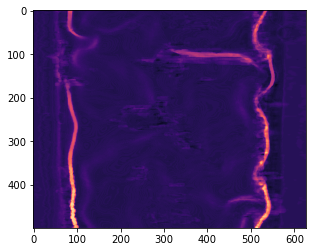

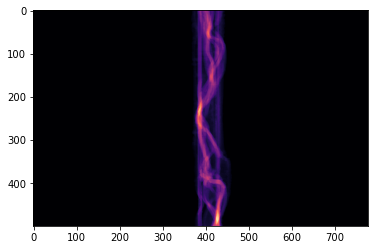

In [71]:
im = project_front(membrane)
plt.imshow(im, cmap='magma')
plt.show()

im = project_left(membrane)
plt.imshow(im, cmap='magma')
plt.show()

im = project_top(membrane)
plt.imshow(im, cmap='magma')
plt.show()

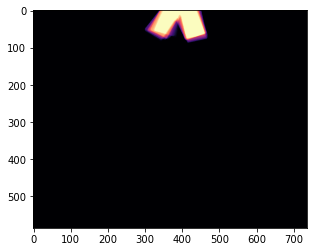

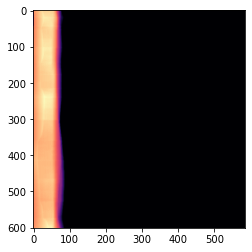

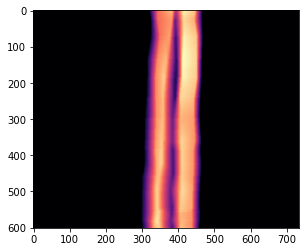

In [64]:
im = project_front(gaskets)
plt.imshow(im, cmap='magma')
plt.show()

im = project_left(gaskets)
plt.imshow(im, cmap='magma')
plt.show()

im = project_top(gaskets)
plt.imshow(im, cmap='magma')
plt.show()

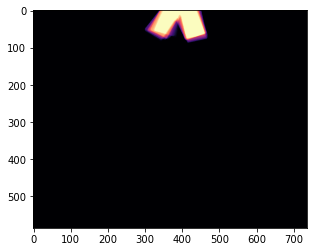

In [26]:
plt.imshow(np.sum(gaskets, axis=0), cmap='magma')

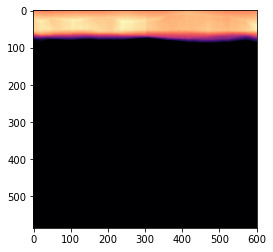

In [34]:
gaskets_rot = np.transpose(gaskets)
plt.imshow(np.sum(gaskets_rot, axis=0), cmap='magma')

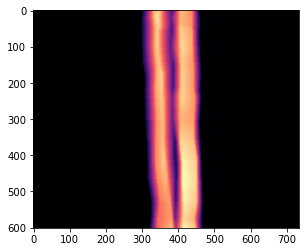

In [33]:
gaskets_rot2 = np.transpose(gaskets, axes=(1,0,2))
plt.imshow(np.sum(gaskets_rot2, axis=0), cmap='magma')

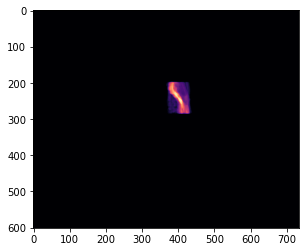

In [35]:
membrane_rot2 = np.transpose(membrane, axes=(1,0,2))
plt.imshow(np.sum(membrane_rot2, axis=0), cmap='magma')

In [28]:
def read_slice_from_multi_tiff(path, slice_num):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
    img = Image.open(path)
    images = []
 
    img.seek(slice_num)
    
    slice_ = np.array(img)
    
    #slice_ = np.zeros((img.height, img.width))
            
    #for j in range(slice_.shape[0]):
    #    for k in range(slice_.shape[1]):
            #print j,k
    #        slice_[j,k] = img.getpixel((k, j))

    return slice_

In [68]:
input_path = Path('z:\\tomo\\ershov\\batteries\\A2021-031-019033\\Experiment2_bis\\')


slice_num = 500
trim_diff_value = -50

#geometry = "GFD"
#geometry = "GDL"
geometry = "GFA"

dataset = f"{geometry}_200mV"
im1_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_100 = im1_100.astype(float)-im2_100.astype(float)
diff_100[diff_100 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_200mV"
im1_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_200 = im1_200.astype(float)-im2_200.astype(float)
diff_200[diff_200 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_300mV"
im1_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_300 = im1_300.astype(float)-im2_300.astype(float)
diff_300[diff_300 < trim_diff_value] = trim_diff_value


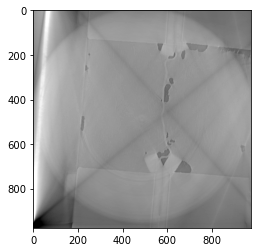

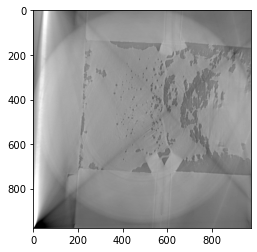

uint8


In [49]:
plt.imshow(im1_300, cmap='gray')
plt.show()

plt.imshow(im2_300, cmap='gray')
plt.show()

print(im1.dtype)

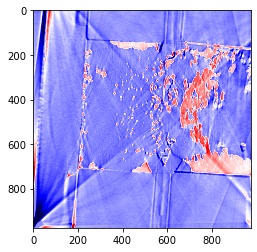

In [50]:
plt.imshow(diff_300, cmap='seismic')

## Overview

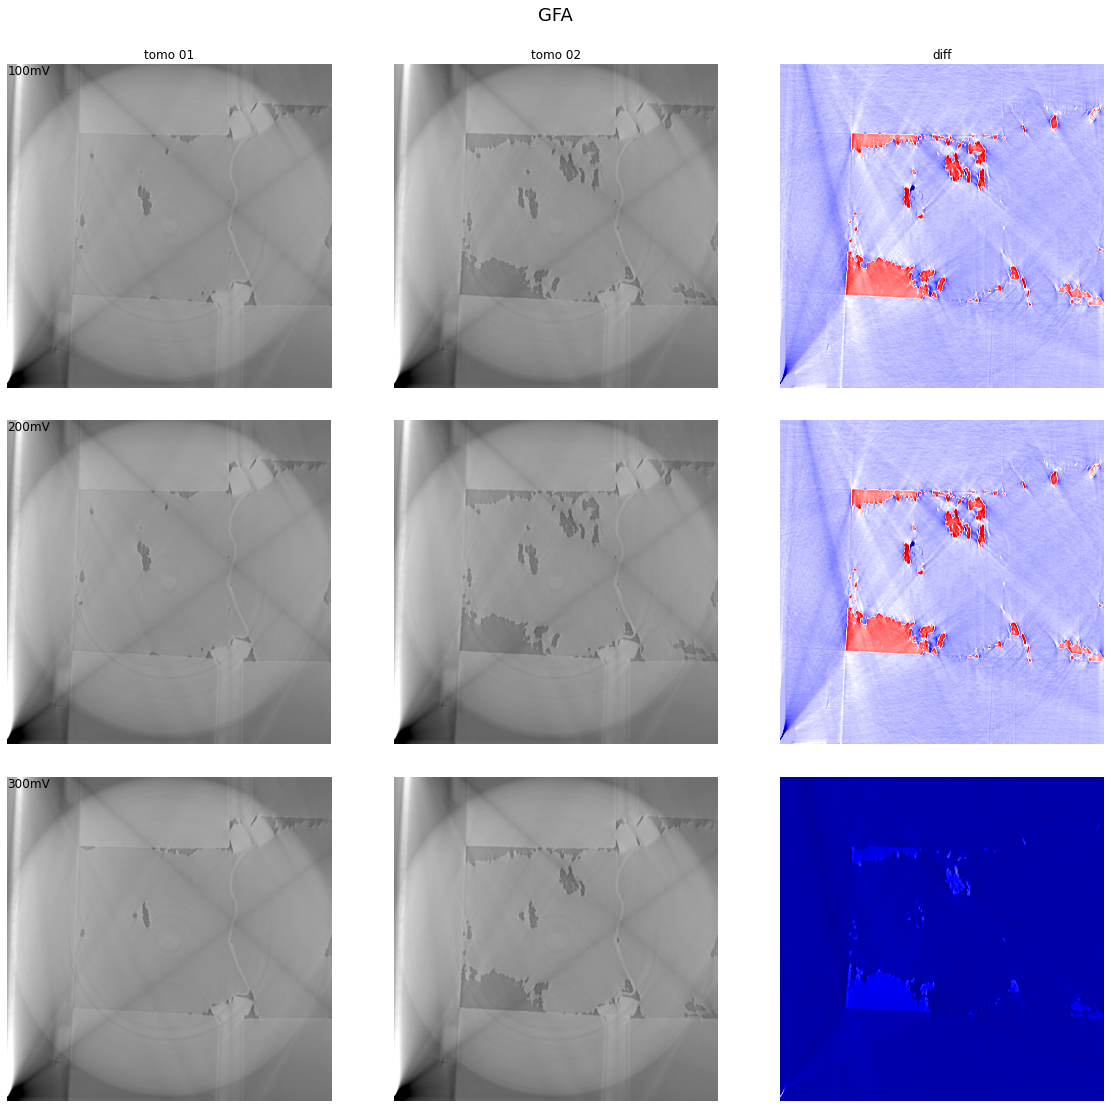

In [69]:
fig = plt.figure()

fig.set_size_inches(16, 16, forward=True)
plt.subplots_adjust(top=0.90, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(3, 3)

ax0 = plt.subplot(gs[0, 0])
plt.axis('off')
plt.imshow(im1_100, cmap='gray')
plt.title('tomo 01')
#ax0.set_ylabel('100')
ax0.text(0.2, 0.2, '100mV', va="top", ha="left", fontsize=12)
#ax0.text(0.5, 0.5, 'top view2', va="center", ha="center", fontsize=16)
#ax0.text(0.5, 0.5,"top", va="center", ha="center", fontsize=16)

ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(im2_100, cmap='gray')
plt.title('tomo 02')

ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(diff_100, cmap='seismic')
plt.title('diff')

ax3 = plt.subplot(gs[1, 0])
plt.axis('off')
plt.imshow(im1_200, cmap='gray')
ax3.text(0.2, 0.2, '200mV', va="top", ha="left", fontsize=12)

ax4 = plt.subplot(gs[1, 1])
plt.axis('off')
plt.imshow(im2_200, cmap='gray')

ax5 = plt.subplot(gs[1, 2])
plt.axis('off')
plt.imshow(diff_200, cmap='seismic')



ax6 = plt.subplot(gs[2, 0])
plt.axis('off')
plt.imshow(im1_300, cmap='gray')
ax6.text(0.0, 0.0, '300mV', va="top", ha="left", fontsize=12)

ax7 = plt.subplot(gs[2, 1])
plt.axis('off')
plt.imshow(im2_300, cmap='gray')

ax8 = plt.subplot(gs[2, 2])
plt.axis('off')
plt.imshow(diff_300, cmap='seismic')


fig.suptitle(f'{geometry}', x=0.5, y=0.95, fontsize=18, va='top')

fig.savefig(input_path / f'overview_{geometry}.png')
plt.show()